In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import wine_prep
from model_functions import *
from plotting_functions import nn_plot_mse, nn_plot_mse_many
import no_gpu
import reproducible
from sklearn.metrics import mean_squared_error

In [4]:
import time

In [5]:
X_train, X_test, y_train, y_test = wine_prep()

In [6]:
layers = 4
neurons = [32, 32, 16, 1]
n_cols = X_train.shape[1]
batch_size = 100      # X_train.shape[0]
epochs = 20
optimizer = "sgd"

Epoch 1/20
42/42 [==============================] - 0s 5ms/step - loss: 2.9168 - mse: 2.9168 - val_loss: 0.7805 - val_mse: 0.7805
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 0.7485 - mse: 0.7485 - val_loss: 0.6329 - val_mse: 0.6329
Epoch 3/20
42/42 [==============================] - 0s 2ms/step - loss: 0.6461 - mse: 0.6461 - val_loss: 0.5903 - val_mse: 0.5903
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5949 - mse: 0.5949 - val_loss: 0.5627 - val_mse: 0.5627
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5670 - mse: 0.5670 - val_loss: 0.5561 - val_mse: 0.5561
Epoch 6/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5494 - mse: 0.5494 - val_loss: 0.5452 - val_mse: 0.5452
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5344 - mse: 0.5344 - val_loss: 0.5438 - val_mse: 0.5438
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.5252 - mse: 0.52

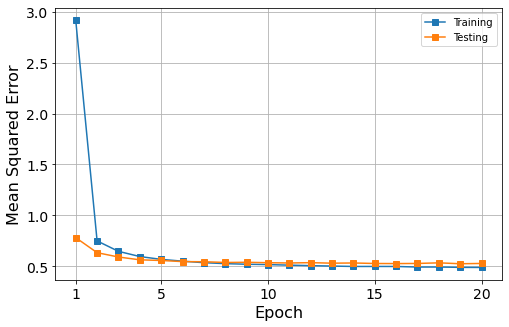

In [7]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols,
                           classification = False)
model = nn_model_compile(model,
                         optimizer = optimizer)
start_time = time.time()
model = nn_model_fit(model,
                     X_train,
                     y_train,
                     X_val = X_test,
                     y_val = y_test,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_mse(model,
            mse_mean = None,
            start_epoch = 1,
            savefig = False,
            file = "../img/wine/wine_{}_E{}_B{}.png".format(optimizer, epochs, batch_size))
#nn_save(model,
#        "../models/wine/wine_{}_E{}_B{}.h5".format(optimizer, epochs, batch_size))